In [5]:
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold, GridSearchCV, RandomizedSearchCV, train_test_split, cross_validate
from scipy.stats import uniform,loguniform
import matplotlib.pyplot as plt

from pylab import rcParams
from time import time


В качестве рабочего набора данных будет использован встроенный набор данных breast_cancer, содержащий в себе 569 записей и информацию по 9 признакам. Для каждого из этих признаков были рассчитаны среднее значение, стандартная ошибка и «наихудшее» или наибольшее (среднее из трех самых больших значений) значение, что дало 30 признаков. Каждая из записей данных имеет метку Malignant (злокачественная опухоль) (212 записей) или Benign(доброкачественная опухоль) (357).

In [2]:
cancer = load_breast_cancer()

## 1.2. Grid Search optimization

### 1.2.1. RandomizedSearchCV (C = [10^-4, 10^0])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

import warnings
warnings.filterwarnings("ignore")

RandomizedSearchCV took 18.94 seconds for 100 candidates


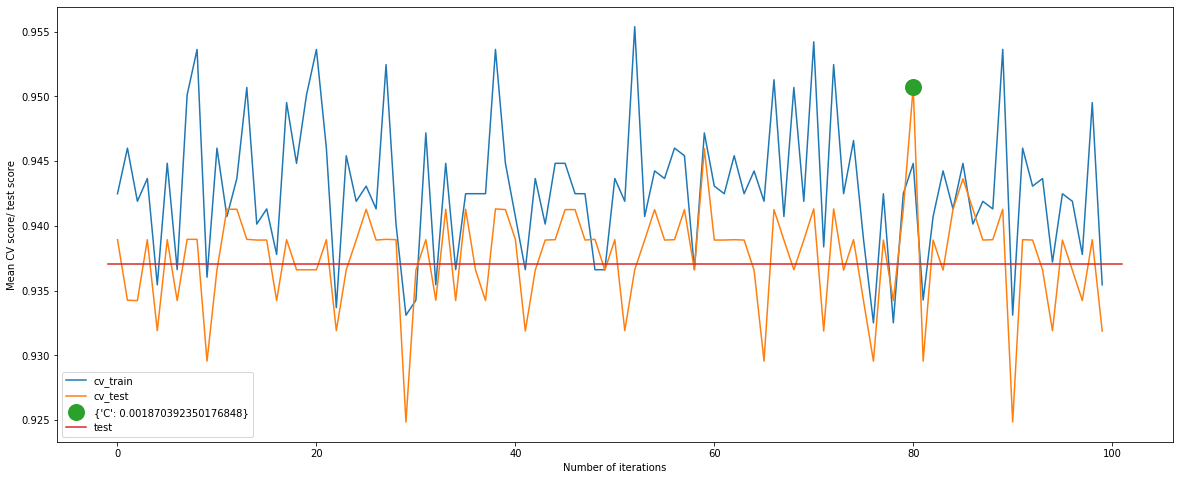

In [6]:
param_grid_log =  {'C': loguniform(10**(-4),10**0)}
random_search_log = RandomizedSearchCV(LogisticRegression(),param_distributions = param_grid_log, 
                                   n_iter = 100, cv = 5,return_train_score=True, random_state = 0)
start = time()
random_search_log.fit(X_train,y_train)

print("RandomizedSearchCV took {:.2f} seconds for {} candidates".format((time() - start),random_search_log.n_iter))

best_C = random_search_log.best_params_
num_iter = random_search_log.n_iter
best_point = random_search_log.best_index_

cv_train_mean_scores = random_search_log.cv_results_['mean_train_score']
cv_test_mean_scores = random_search_log.cv_results_['mean_test_score']
test_score = random_search_log.score(X_test,y_test)

rcParams['figure.figsize'] = 20, 8
plt.plot(np.arange(0,num_iter,1), cv_train_mean_scores, label = 'cv_train')
plt.plot(np.arange(0,num_iter,1), cv_test_mean_scores, label = 'cv_test')
plt.plot(np.arange(0,num_iter,1)[best_point], cv_test_mean_scores[best_point], 'o',markersize=15, mew = 2,
         label = '{}'.format(best_C))
plt.plot([-1,num_iter+1], [test_score,test_score], label = 'test')
plt.xlabel('Number of iterations')
plt.ylabel('Mean CV score/ test score')
plt.legend(loc = 'best')
plt.show()

In [7]:
print("Best parameter {}".format(best_C))
print('Средняя правильность на тренировочном наборе при CrossValidation: {:.2f}'.format(np.mean(cv_train_mean_scores)))
print('Средняя правильность на тестовом наборе при CrossValidation: {:.2f}'.format(np.mean(cv_test_mean_scores)))
print('Правильность на тестовом наборе: {:.2f}'.format(test_score))

Best parameter {'C': 0.001870392350176848}
Средняя правильность на тренировочном наборе при CrossValidation: 0.94
Средняя правильность на тестовом наборе при CrossValidation: 0.94
Правильность на тестовом наборе: 0.94


### 1.2.2. GridSearchCV (C = [10^-4, 10^0])

GridSearchCV took 19.55 seconds for 100 candidates


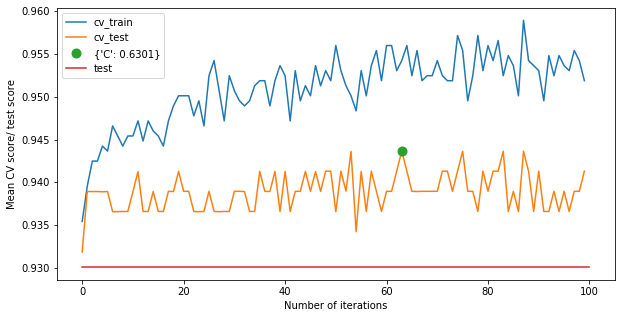

In [8]:
param_grid = {'C': np.arange(10**(-4),10**0,0.01)}

grid_search = GridSearchCV(LogisticRegression(), param_grid, return_train_score=True)
start = time()
grid_search.fit(X_train,y_train)
print("GridSearchCV took {:.2f} seconds for {} candidates".format((time() - start),
                                                                  len(grid_search.cv_results_['params'])))

best_C = grid_search.best_params_
num_iter = len(grid_search.cv_results_['params'])
best_point = grid_search.best_index_

cv_train_mean_scores = grid_search.cv_results_['mean_train_score']
cv_test_mean_scores = grid_search.cv_results_['mean_test_score']
test_score = grid_search.score(X_test,y_test)

rcParams['figure.figsize'] = 10, 5
plt.plot(np.arange(0,num_iter,1), cv_train_mean_scores, label = 'cv_train')
plt.plot(np.arange(0,num_iter,1), cv_test_mean_scores, label = 'cv_test')
plt.plot(np.arange(0,num_iter,1)[best_point], cv_test_mean_scores[best_point], 'o',markersize=8, mew = 2,
         label = '{}'.format(best_C))
plt.plot([0,num_iter], [test_score,test_score], label = 'test')
plt.xlabel('Number of iterations')
plt.ylabel('Mean CV score/ test score')
plt.legend(loc = 'best')
plt.show()

In [9]:
print("Best parameter {}".format(best_C))
print('Средняя правильность на тренировочном наборе при CrossValidation: {:.2f}'.format(np.mean(cv_train_mean_scores)))
print('Средняя правильность на тестовом наборе при CrossValidation: {:.2f}'.format(np.mean(cv_test_mean_scores)))
print('Правильность на тестовом наборе: {:.2f}'.format(test_score))

Best parameter {'C': 0.6301}
Средняя правильность на тренировочном наборе при CrossValidation: 0.95
Средняя правильность на тестовом наборе при CrossValidation: 0.94
Правильность на тестовом наборе: 0.93


### 1.2.3. Best estimators GridSearchCV and RandomizedSearchCV (C = [10^-4, 10^0])

In [10]:
print(grid_search.best_estimator_)
print()
print(random_search_log.best_estimator_)

LogisticRegression(C=0.6301, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.001870392350176848, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


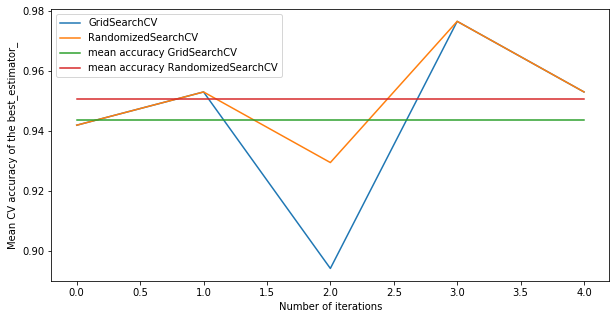

In [11]:
GridS = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
RandS = cross_val_score(random_search_log.best_estimator_, X_train, y_train, cv=5)
rcParams['figure.figsize'] = 10, 5
plt.plot(np.arange(0,len(GridS),1), GridS, label = 'GridSearchCV')
plt.plot(np.arange(0,len(RandS),1), RandS, label = 'RandomizedSearchCV')

plt.plot([0,len(GridS)-1], [np.mean(GridS),np.mean(GridS)], label = 'mean accuracy GridSearchCV')
plt.plot([0,len(RandS)-1], [np.mean(RandS),np.mean(RandS)], label = 'mean accuracy RandomizedSearchCV')


plt.xlabel('Number of iterations')
plt.ylabel('Mean CV accuracy of the best_estimator_')
plt.legend(loc = 'best')
plt.show()

In [12]:
print('Правильность CV для GridSearchCV ={:.2f}, RandomizedSearchCV ={:.2f}'. format(np.mean(GridS),np.mean(RandS)))

Правильность CV для GridSearchCV =0.94, RandomizedSearchCV =0.95
